# Lab 2
## Exploring Image Data

Drew Harris, Drew Stewart, Alex Petmecky

In [2]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# Load images into numpy array
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray


# Business Understanding
This data is a collection of images of multiple different weather types and conditions (dew, fog, frost, lightning, etc ). The data was initially collected to be implemented as a weather classifier. The predication task is going to be to predict current weather in an area based off an image. It could analyze a weather tower's live camera feed by taking screenshots every few minutes for example. Some interested parties I believe would be weather and news stations, governments, individuals and possibly schools. I can see weather stations, news stations and governments using these results to push out real time alerts for certain dangerous weather conditions, and individuals who want to be warned or notified of the current weather in an area, or even schools to use these classified images as examples of certain weather types and conditions. This is an important classification because it can easily create real time weather alerts for drivers and other interested parties as well as be used in future efforts to discern what weather condition is occurring in an image. The model should be able to correctly classify images around 80% of the time to actually be helpful. For the more dangerous weather scenarios, the accuracy should be more important but for finding differences between things like "cloudy" and "sunny", it is not as important to have an accurate prediction. In a real world scenario we can also make use of other observation tools such as temperature, humidity, and wind speed to help classify the weather and not soley rely on the image data.

In [4]:
import imageio
import glob
# Load images into numpy array
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray

image_dir = "./images/"
n_components = 200
h=100
w=100
def load_dir(dir_name,h,w):
    files = glob.glob(image_dir + dir_name+"/*.jpg", recursive=True)
    images = []
    titles = []
    npImgs = []
    pca_images = []
    rpca_images = []
    
    
    # Place in numpy array with labels from foldernames
    for f1 in files:
        # set target as parent directory
        target = f1.split("/")[-2]
        
        # read image and convert to grayscale
        img = io.imread(f1,as_gray=True)
        
        # resize image
        img = resize(img, (h, w))
        
        # create numpy array from image
        imgnum = np.array(img)
        images.append(imgnum)
        titles.append(target)
        
        #flatten to 1-D
        imgFlat = imgnum.flatten()
        
        npImgs.append(imgFlat)
    
    
    npImgs = np.array(npImgs)
    return npImgs,titles,images

npImgs,titles,images = load_dir(dir_name="lightning",h=h,w=w)
rainbowNP,rainbowTitles,rainbowImages = load_dir(dir_name="rainbow",h=h,w=w)



print(npImgs.shape)
print(len(images)," ",len(images[0][0]))

(377, 10000)
377   100


In [5]:
# Visualize Several Images
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
       
"""
j=1
for i in range(0,12):
    if(i%3 ==0):
        j+=1
        
    plt.subplot(j,3,i+1)
    plt.imshow(images[i])
    plt.show()
"""

'\nj=1\nfor i in range(0,12):\n    if(i%3 ==0):\n        j+=1\n        \n    plt.subplot(j,3,i+1)\n    plt.imshow(images[i])\n    plt.show()\n'

#Displaying Some of the preprocessed images (turned greyscale/resized)

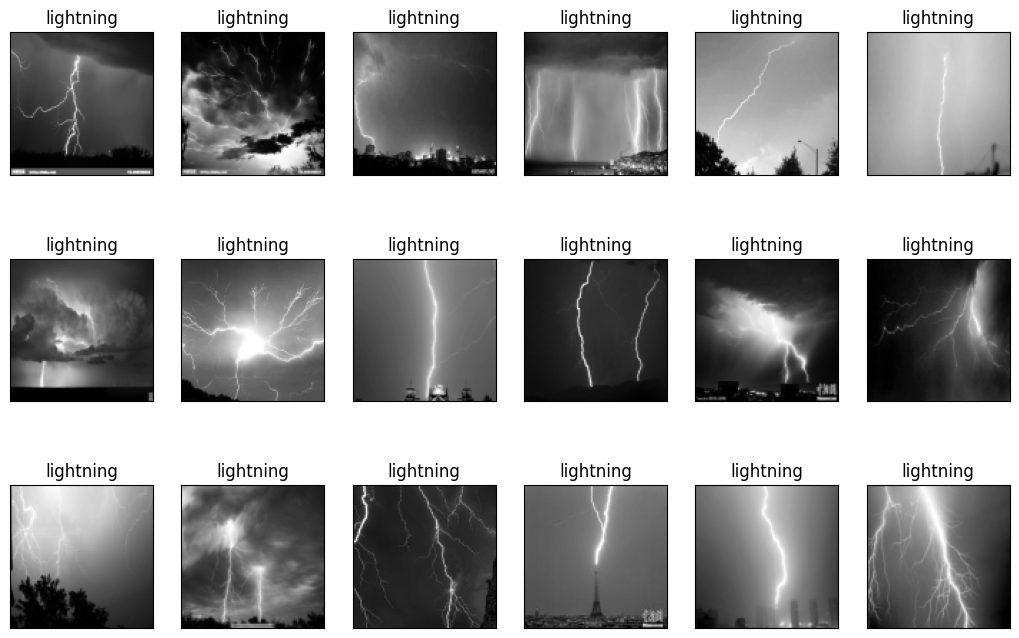

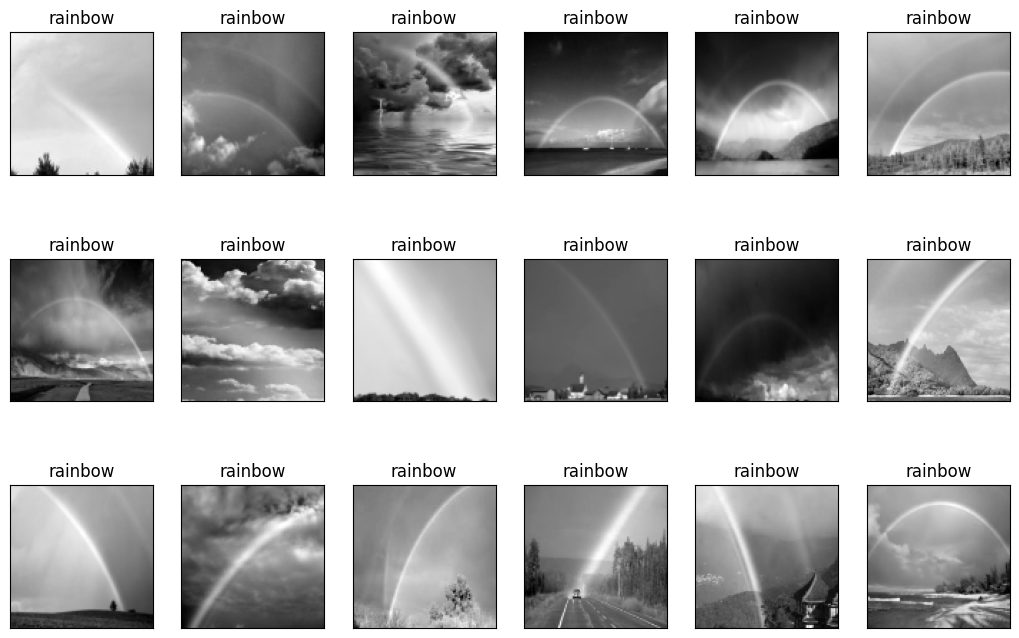

In [6]:
plot_gallery(images=images,titles=titles,h=h,w=h)
plot_gallery(images=rainbowImages,titles=rainbowTitles,h=h,w=h)

In [20]:

#regular PCA linearization
pca = PCA(n_components = n_components)
pca.fit(npImgs.copy())


#linearize using RPCA
rpca = PCA(n_components=n_components, svd_solver='randomized')
rpca.fit(npImgs.copy())



PCA(n_components=200, svd_solver='randomized')

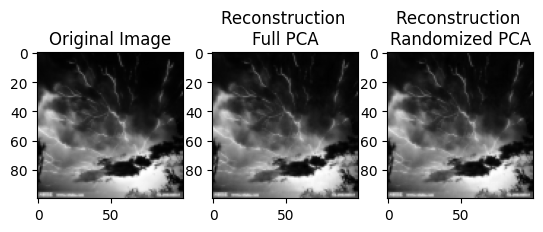

In [8]:

#function to reconstruct the image
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image


#function to show a variance plot of the pca function
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

images = np.array(images)
#elem,h,w = images.shape



#reconstruction of pca
idx_to_reconstruct = 1 #which image to rebuild
npImgs_idx = npImgs[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,npImgs_idx.reshape(1, -1))

#def recon_pca(npImgs,pca):
#    idx_to_reconstruct = 1    
#    npImgs_idx = npImgs[idx_to_reconstruct]
#    low_dimensional_representation, reconstructed_image = reconstruct_image(pca,npImgs_idx
#.reshape(1, -1))
#    return

#reconstruction of rpca 
low_dimensional_representation, R_reconstructed_image = reconstruct_image(rpca,npImgs_idx.reshape(1, -1))



#display image
plt.subplot(1,3,1)
plt.imshow(npImgs_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original Image')
plt.grid(False)
plt.subplot(1,3,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstruction \nFull PCA')

plt.subplot(1,3,3)
plt.imshow(R_reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstruction \nRandomized PCA')
plt.grid(False)




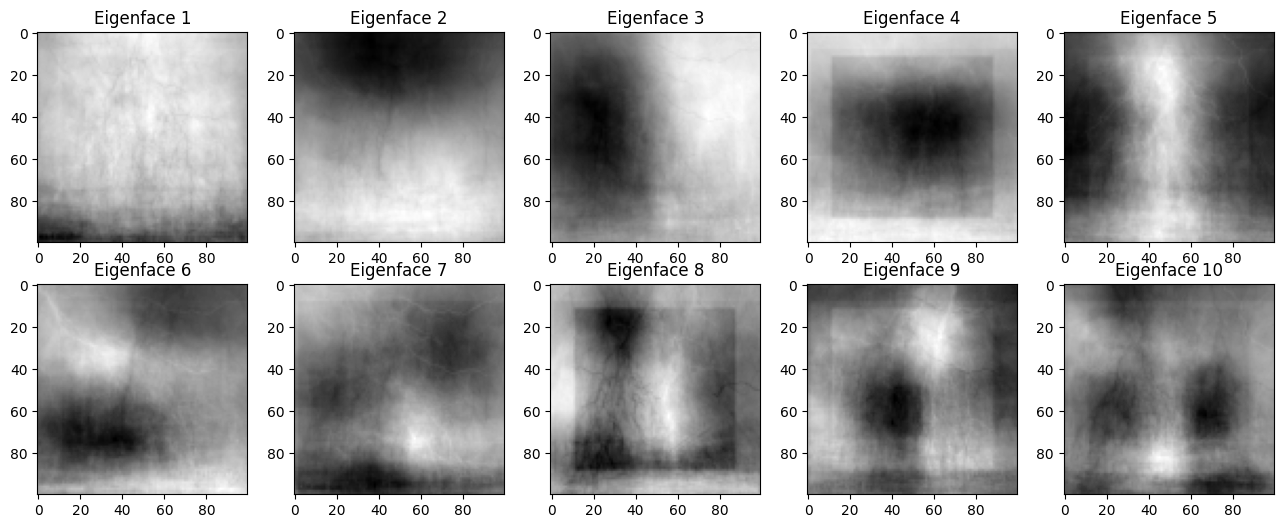

In [21]:
# Display the eigenstorms
eigenBuilds = pca.components_.reshape((n_components, h, w))
eigenBuildsR = rpca.components_.reshape((n_components, h, w))

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenBuilds[i], cmap=plt.cm.gray)
    plt.title('Eigenface {}'.format(i + 1))
    plt.grid(False)


The images above show the origional image along with reconstructed images. While the origional is better quality, the PCA and RPCA are still relatively good quality and significantly smaller in data points than the original image

# PCA Variance Graph

In [9]:
plot_explained_variance(pca)

# RPCA Variance Graph

In [10]:
plot_explained_variance(rpca)

The graphs above show the variance of the PCA and RPCA algorithms.
 With the data that we used, it seems that the variance is not much differnet at most levels, but the PCA appears to preform marginally better at 199 Components than RPCA

# Feature Extraction Using DAISY

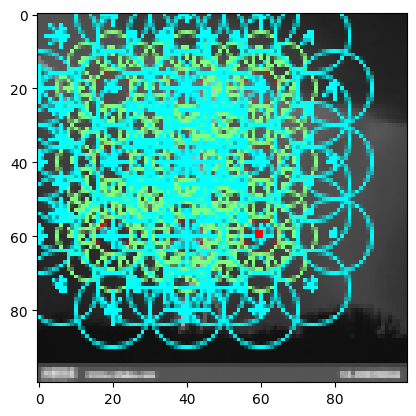

In [11]:
from skimage.feature import daisy

features, img_desc = daisy(images[0], 
                           step=20, 
                           radius=20, 
                           rings=2, 
                           histograms=8, 
                           orientations=8, 
                           visualize=True)
plt.imshow(img_desc)
plt.grid(False)
plt.show()

In [12]:
features = daisy(images[0], step=10, radius=20, rings=2, histograms=8, orientations=4, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

(6, 6, 68)
2448


In [13]:
# Takes in a row and get a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape), step=10, radius=20, 
                 rings=2, histograms=8, orientations=4, 
                 visualize=False)
    return feat.reshape((-1))

In [14]:
# Tests daisy on 1 row
test_feature = apply_daisy(npImgs[3],(h,w))
test_feature.shape

(2448,)

In [15]:
# Running DAISY on the entire dataset, row by row
daisy_features = np.apply_along_axis(apply_daisy, 1, npImgs, (h,w))
print(daisy_features.shape)

(377, 2448)


In [16]:
from sklearn.metrics.pairwise import pairwise_distances

#get the pairwise distance between features
dist_matrix = pairwise_distances(daisy_features)

#print(dist_matrix)


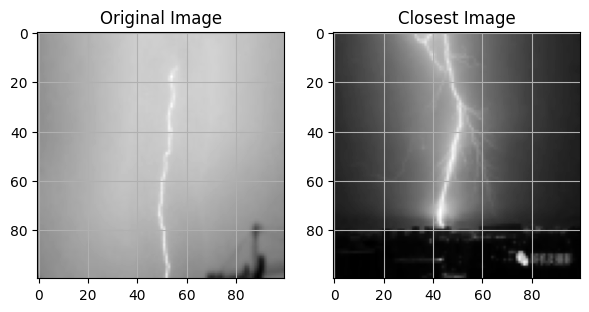

In [19]:
#Using the features to find the closest image to current
import copy

idx1 = 5
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty #prevents from picking the same image
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
plt.imshow(npImgs[idx1].reshape((h,w)), cmap=plt.cm.gray)
plt.title("Original Image")
plt.grid()

plt.subplot(1,2,2)
plt.imshow(npImgs[idx2].reshape((h,w)), cmap=plt.cm.gray)
plt.title("Closest Image")
plt.grid()